In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

C:\Users\namit\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [8]:
train_csv = pd.read_csv(r'C:\Users\namit\Desktop\Assignment_nosh\Training_set.csv')
test_csv = pd.read_csv(r'C:\Users\namit\Desktop\Assignment_nosh\Testing_set.csv')

In [9]:
train_fol = glob.glob(r"C:\Users\namit\Desktop\Assignment_nosh\train\*") 
test_fol = glob.glob(r"C:\Users\namit\Desktop\Assignment_nosh\test\*")


In [10]:
train_csv.label.value_counts()

sitting     859
standing    859
sleeping    841
Name: label, dtype: int64

In [11]:
import plotly.express as px
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of data_set')
fig.show()

In [12]:
filename = train_csv['filename']

situation = train_csv['label']

situation

0        sitting
1       sleeping
2       sleeping
3       sleeping
4        sitting
          ...   
2554    standing
2555    standing
2556    standing
2557     sitting
2558     sitting
Name: label, Length: 2559, dtype: object

In [13]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = r'C:\Users\namit\Desktop\Assignment_nosh\train/'
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

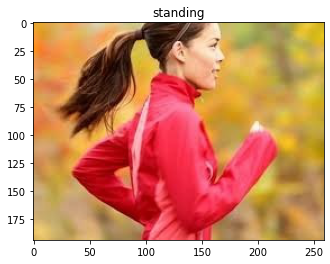

In [10]:
disp()

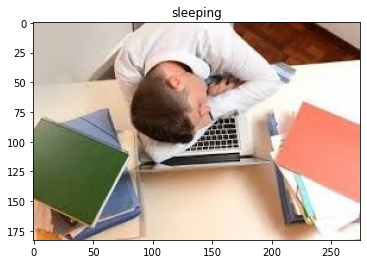

In [20]:
disp()

In [17]:
img_data = []
img_label = []
length = 2559
for i in (range(2559)):
    t =  r'C:\Users\namit\Desktop\Assignment_nosh\train/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [21]:
imp_shape = (160, 160,3)

In [22]:
photo = img_data
photo = np.asarray(photo)
type(photo)

numpy.ndarray

In [23]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0.]


In [24]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=3,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(32, activation='relu'))
vgg_model.add(Dense(3, activation='softmax'))

In [25]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
history = vgg_model.fit(photo,y_train, epochs=8)

Epoch 1/8
80/80 [==============================] - 108s 1s/step - loss: 1.1692 - accuracy: 0.6913
Epoch 2/8
80/80 [==============================] - 124s 2s/step - loss: 0.4285 - accuracy: 0.8292
Epoch 3/8
80/80 [==============================] - 137s 2s/step - loss: 0.2955 - accuracy: 0.8820
Epoch 4/8
80/80 [==============================] - 125s 2s/step - loss: 0.2224 - accuracy: 0.9144
Epoch 5/8
80/80 [==============================] - 126s 2s/step - loss: 0.1672 - accuracy: 0.9414
Epoch 6/8
80/80 [==============================] - 125s 2s/step - loss: 0.1293 - accuracy: 0.9590
Epoch 7/8
80/80 [==============================] - 121s 2s/step - loss: 0.0969 - accuracy: 0.9758
Epoch 8/8
80/80 [==============================] - 120s 2s/step - loss: 0.0742 - accuracy: 0.9852


In [28]:
vgg_model.save_weights("model.h5")

In [19]:
vgg_model.save_weights("model.hdf5")

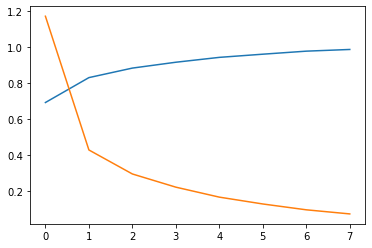

In [29]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])

In [30]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [31]:
def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)
    index=['sitting ','sleeping','standing']
    result = str(index[prediction])
    print(result)

probability: 97.7264404296875%
Predicted class :  2
standing


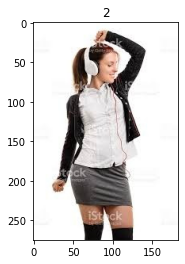

In [86]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_173.JPG")

probability: 78.0589759349823%
Predicted class :  2
standing


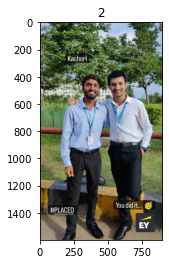

In [69]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/img_20191.JPEG")

probability: 97.64041304588318%
Predicted class :  1
sleeping


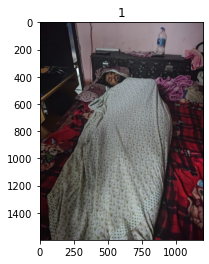

In [70]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/img_20192.JPEG")

probability: 99.98781681060791%
Predicted class :  2
standing


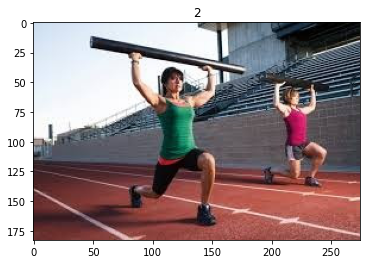

In [71]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_642.JPG")

probability: 98.95483255386353%
Predicted class :  2
standing


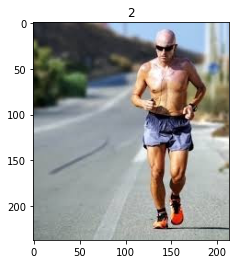

In [72]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_129.JPG")

probability: 76.24806761741638%
Predicted class :  0
sitting 


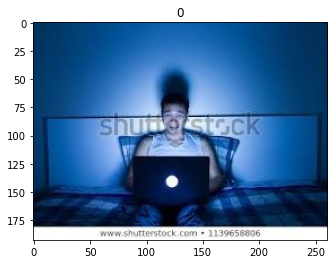

In [73]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_114.JPG")

probability: 97.25570678710938%
Predicted class :  0
sitting 


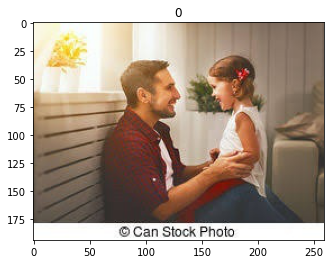

In [74]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_306.JPG")

probability: 99.71370697021484%
Predicted class :  2
standing


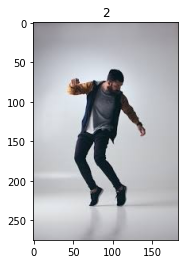

In [75]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_994.JPG")

probability: 98.30750823020935%
Predicted class :  0
sitting 


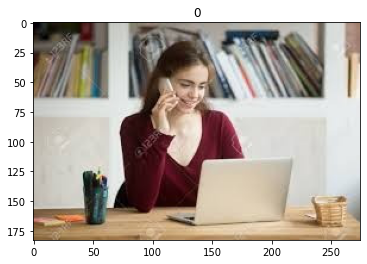

In [87]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_178.JPG")

probability: 93.01308989524841%
Predicted class :  0
sitting 


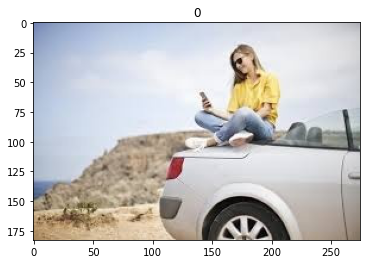

In [77]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_1252.JPG")

probability: 45.99424600601196%
Predicted class :  0
sitting 


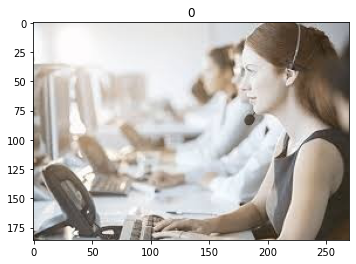

In [78]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_1269.JPG")

probability: 72.82317280769348%
Predicted class :  2
standing


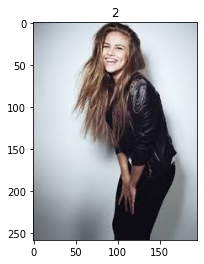

In [88]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_529.JPG")

probability: 99.77890253067017%
Predicted class :  1
sleeping


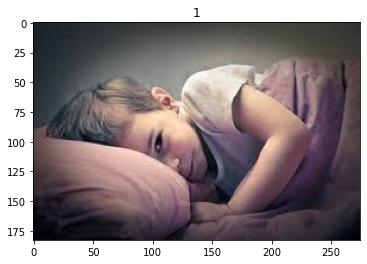

In [89]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_739.JPG")

probability: 73.89065623283386%
Predicted class :  2
standing


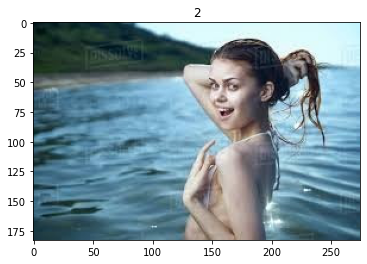

In [90]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_868.JPG")

probability: 99.29290413856506%
Predicted class :  2
standing


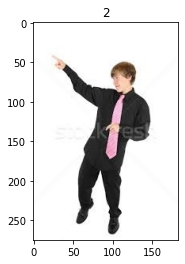

In [91]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_1058.JPG")

probability: 99.99903440475464%
Predicted class :  1
sleeping


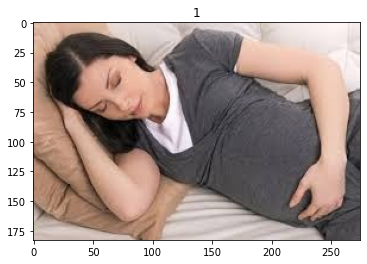

In [92]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/Image_1153.JPG")

probability: 98.10580015182495%
Predicted class :  2
standing


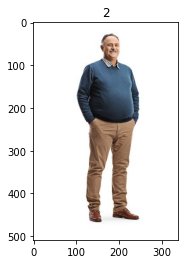

In [121]:
test_predict(r"C:\Users\namit\Desktop\Assignment_nosh\test/img_2019.JPEG")